<a href="https://colab.research.google.com/github/kmeezan/MachineLearningPub/blob/master/Oregon_Temperature_Time_Step2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

#Introduction
This is the second in a series introducing Machine Learning using geospatial data. This project adds the variable of time into the model. The overall project is based on the Machine Learning Basic Regression tutorials presented by Google Colab.  The [base example](https://https://github.com/tensorflow/docs/blob/master/site/en/tutorials/keras/basic_regression.ipynb) shows machine learning to predict fuel efficiency  of cars.

## Modifications to this project
This project builds on the  base Machine Learning with Tensor Flow on Google CoLabs project ([link to GitHub code](https://https://github.com/kmeezan/ML_surfaceTemp/blob/master/ShareCopyNN_JanTMax.ipynb)). This project adds the variable of *time*. Input variables are latitude, longitude, elevation and month (1-12), with the predicted value of TMAX or maximum temperature. By adding the variable of time, this project introduces some additional complexities in the visualization of the data by revising the visualization to four dimensions (latitude, longitude, time and temperature), which are rendered as three dimensional scatter plots. This project presents a methodology to slice the test data set by time and visualize the results as two dimensional scatter plots (latitude, longitude and temperature)  by time slice.


  <a target="_blank" href="https://github.com/kmeezan/ML_surfaceTemp/blob/master/ShareCopyNN_OregonTMAX.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>


##Geospatial Applications

 This project has modified the base example to demonstrate basic Machine Learning techniques using Geospatial data and to provide a hands on introduction to Machine Learning tools.

###Why Oregon?
 
 The data for this project was downloaded from the National Weather Service, which provides monthly maximum temperature readings for weather stations across the United States. The data set for the entire United States is very large. Oregon was selected for its compact size, as well as its geographic orientation with a coastline, mountain range and mid-latitude, all of which provide potential for predictable temperature patterning throughout the year. 
 

##How to use this project
This project is the second in a series to provide a guided introduction to Machine Learning and Neural Networks using Tensor Flow via the Google Colab platform. The first in the series, [*Predicting January Maximum Temperature*](https://github.com/kmeezan/MachineLearningPub/blob/master/JanTMax_ML_Step1.ipynb) , provides a foundation to Machine Learning. This notebook assumes that the user has a foundation level understanding of Machine Learning and neural networks. 

To use this notebook, start by reading and running each cell in the notebook, then use the guided learning companion documentation to explore the structure of the neural network and swap in your own data set.

**To run the project**, click on the play button in each code cell. Cells must be run sequentially. You can restart the runtime from the Runtime pulldown menu.

###About Colab and TensorFlow
[TensorFlow](https://www.tensorflow.org/) is the dominant deep learning tool for Data Scientists. TensorFlow can run as a stand-alone software, but you need to have a fairly robust computer to run it efficiently. Colab is a Google Cloud solution that allows you to run TensorFlow in the cloud (via your Google account). 

For this project, you should have a Google account and (if you want to run a project with your own data set) a GitHub account. For an easy introduction to GitHub, see[ this tutorial.](https://guides.github.com/activities/hello-world/)





In [0]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Project Overview
This notebook uses monthly average maximum surface temperature readings collected from National Weather Service stations in the state of Oregon, United States for the period January 2013 through December 2018. Therefore each spatial location (latitude/longitude pair) has six training points replicating latitude, longitude, elevation, month and temperature. The data set consists of 18,137 data points covering 252 weather stations (seven data points did not have a temperature reading and were removed from the data set during pre-processing of the data).

## Geospatial Technology and Machine Learning
There are two types of predictions in Machine Learning. A regression problem predicts a continuous numeric value such as a price or a probability. A classification problem selects a class from a list of classes (for example, where a picture contains cat or a dog, recognizing and classifying which animal is in the picture).

This notebook is intended as a model for how machine learning can work on a regression problem with spatially distributed data sets over time. We are going to examine a regression problem (predicting surface temperature) in this notebook.

This example uses the tf.keras API, see[ this guide](https://www.tensorflow.org/guide/keras) for details.


#Install modules to run the neural network
The first thing we need to do is install the modules that we need to run our model. TensorFlow uses the programming language Python, and we are going to install and import several 'add on' modules.

In [0]:
# Use seaborn for pairplot
!pip install seaborn

In [0]:
#Import modules 
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

plt.style.use('classic')

import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

1.13.1


# Get the data
In this step, you will download the data set that the model will use. In this case, the data is housed in a file on GitHub. 

Three good methods to access CSV files in CoLab can be found [here](https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92). This is an excerpt that was applied to create the snippit below: The easiest way to upload a CSV file is from your GitHub repository. Click on the dataset in your repository, then click on View Raw. Copy the link to the raw dataset and store it as a string variable called url in Colab. Note that the GitHub file needs to be public for this to work.

In [0]:
# link to data on GitHub
url = 'https://raw.githubusercontent.com/kmeezan/ML_surfaceTemp/master/test6_oregon_cleaned.csv'


# print the first 10 lines of the file to confirm
print(pd.read_csv(url, nrows=5))


# access the data in a Pandas Dataframe
dataset = pd.read_csv(url)
   

   LATITUDE  LONGITUDE  ELEVATION  MONTH  TMAX
0   44.8773  -117.1095      808.6      1  21.5
1   44.8428  -117.8086     1024.4      1  22.8
2   43.5950  -118.9564     1261.9      1  23.3
3   44.8142  -117.7289     1202.4      1  23.8
4   44.8773  -117.1095      808.6     12  24.0


#Clean the data for use with the model
Nearly all data will need to be manipulated in some way in order for you to use it in a TensorFlow model. The data we are using has been pre-processed by removing unnecessary fields and null values, and saving it in a CSV format. We are now going to do some additional pre-processing within this notebook.
## Split the data into train and test

The data will be split into two groups: The 'training' set will be used to train the neural network. The remaining 'test' set will be reserved to test our model and see how well it learned.


In [0]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

print("The length of the training set is: ", len(train_dataset), 
      "\nThe length of the testing data set is: ", len(test_dataset))

The length of the training set is:  14510 
The length of the testing data set is:  3627


# Inspect the data
Our data set has the variables latitude, longitude, elevation and temperature (maximum average temperature for January 2019). Let's take a quick look at the joint distribution of a few pairs of columns from the training set to get an idea of what we are dealing with.

We will use `seaborn pairplot` to graph each variable against the other. The line plots are actually histograms showing the frequency of the data (latitude vs. latitude, etc), the remainder are scatter plots.

Note that the Latitude/Longitude pairing ends up looking like an outline of the state of Oregon (which it should!). Do you notice any other patterns in the data? 

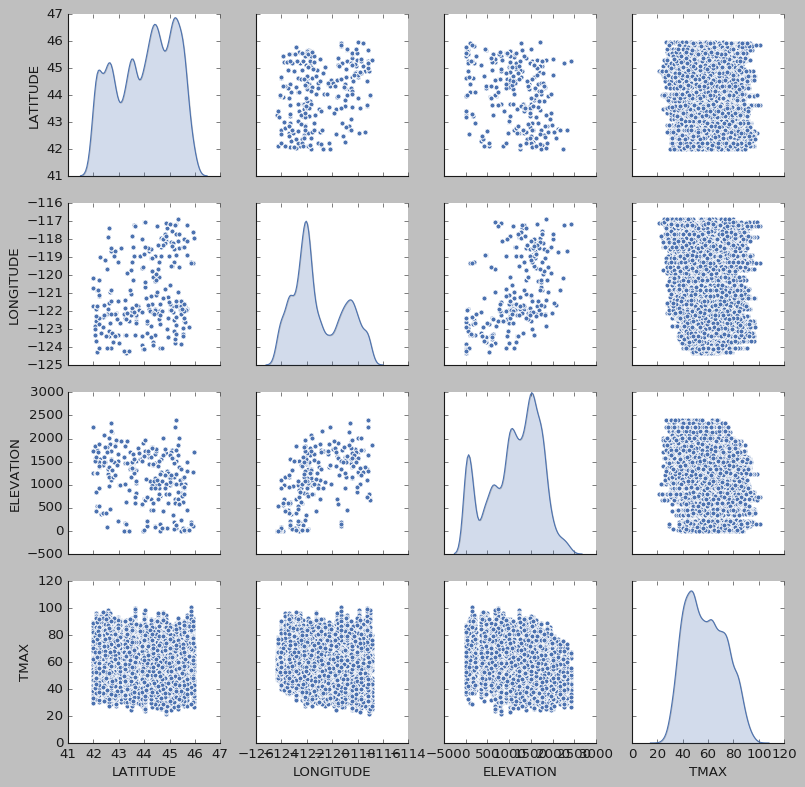

In [0]:
sns.pairplot(train_dataset[["LATITUDE", "LONGITUDE", "ELEVATION", "TMAX"]], diag_kind="kde")

Next, let's look at some of the statistics of the training set

In [0]:
train_stats = train_dataset.describe()
train_stats.pop("TMAX")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
LATITUDE,14510.0,44.047418,1.127417,41.9900,43.0361,44.2333,45.0400,45.9800
LONGITUDE,14510.0,-121.057490,2.007806,-124.3186,-122.5063,-121.7167,-119.2461,-116.8675
ELEVATION,14510.0,1124.851254,592.322234,2.4000,684.3000,1225.3000,1569.7000,2411.0000
MONTH,14510.0,6.358305,3.505656,1.0000,3.0000,6.0000,9.0000,12.0000


## Split features from labels

The next step in pre-processing our data is to separate the target value, or "label", from the features that we are going to use to predict the target value. This label is the value that you will train the model to predict.

In this case, our 'label' is 'TMAX' or the maximum average monthly temperature recorded at each weather station in the month of January, 2019.

In [0]:
train_labels = train_dataset.pop('TMAX')
test_labels = test_dataset.pop('TMAX')

## Normalize the data

Look again at the train_stats block above and note the broad range of values for each data type.

It is good practice to normalize features that use different scales and ranges. Although the model might converge without feature normalization, it makes training more difficult, and it makes the resulting model dependent on the choice of units used in the input.

Note: Although we intentionally generate these statistics from only the training dataset, these statistics will also be used to normalize the test dataset. We need to do that to project the test dataset into the same distribution that the model has been trained on.


In [0]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

This normalized data is what we will use to train the model.

*Caution*: The statistics used to normalize the inputs here (mean and standard deviation) need to be applied to any other data that is fed to the model. That includes the test set as well as live data when the model is used in production.


#Build the model
Now it is time to build our model. We will be creating an artificial  neural network (an example of Deep Learning)

##About neural networks
A neural network consists of an input layer of data, a series of 'hidden layers' and an output layer, or prediction. The hidden layers have a series of 'nodes' that contain algorithms that help to refine the prediction of the network from a pure guess (in its first run), with each run-through of the network refining the accuracy of the guess. For more about neural networks, see the summary in the [*Predicting January Maximum Temperature*](https://github.com/kmeezan/ML_surfaceTemp/blob/master/ShareCopyNN_JanTMax.ipynb) notebook.

`Keras` is the neural network model used by TensorFlow. We will be using a Sequential model with 'dense' type hidden layers.


In [0]:
#Create a function to build the model with keras.Sequential using 2 dense layers with relu activation.
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model

In [0]:
model = build_model()

## Inspect the model

Use the` .summary` method to print a simple description of the model

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                320       
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 4,545
Trainable params: 4,545
Non-trainable params: 0
_________________________________________________________________


Now try out the model. Take a batch of 10 examples from the training data and call ` model.predict` on it.

In [0]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.14949691],
       [ 0.02002476],
       [-0.1318579 ],
       [-0.04049406],
       [-0.23022786],
       [ 0.613551  ],
       [-0.25037497],
       [-0.14887993],
       [-0.07533046],
       [ 0.20102493]], dtype=float32)

It seems to be working, and it produces a result of the expected shape and type.

#Train the model

Now it is time to train our model. We will set the *epochs* to 300 to start with. 

We will train the model and record its training and validation accuracy in the `history` object. It can take some time to train a model, so to help us visualize the training progress, CoLab will produce a graphic printout of the training progress with dots (.  .  .  .  ).

In [0]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    if epoch % 500 == 0: print('*')
    print('.', end='')

#Epochs are the number of training cycles the model will run through    
EPOCHS = 300

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


*
....................................................................................................
....................................................................................................
....................................................................................................

Visualize the model's training progress using the statistics stored in the `history` object. We will first look at the end of the data printout, then graph the results of the entire training process.

In [0]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
295,13.379088,2.876017,13.379084,14.345248,3.015680,14.345245,295
296,13.430354,2.879089,13.430352,13.168485,2.856037,13.168486,296
297,13.440165,2.885770,13.440166,14.293667,2.993588,14.293668,297
298,13.406493,2.876295,13.406489,13.833392,2.889213,13.833391,298
299,13.414136,2.877119,13.414137,13.055243,2.822141,13.055243,299


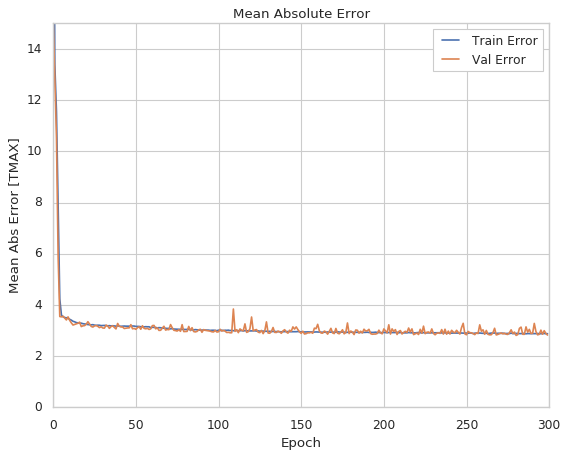

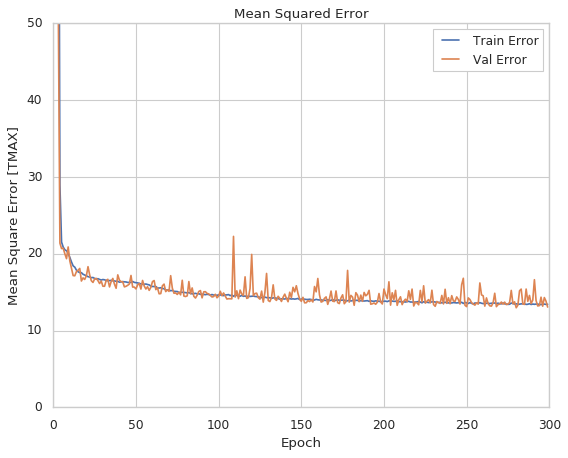

In [0]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  sns.set(style='whitegrid')
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [TMAX]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.title('Mean Absolute Error')
  plt.ylim([0,15])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [TMAX]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.title('Mean Squared Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0,50])
  plt.legend()
  plt.show()


plot_history(history)

## The risks of over training
This graph shows little improvement, or even degradation in the validation error after about 100 epochs. This is a common problem in Machine Learning, especially with a small(ish) dataset: the computer basically memorizes the data. The result is that when presented with a new set of data, it actually does worse because it is trying to fit the new data into what it has memorized, rather than simply applying rules that it has learned.




##Adding patience to our model
In this step we will revise our model by adding a 'patience' parameter to monitor the  validation score. Let's update the `model.fit` call to automatically stop training when the validation score doesn't improve. We'll use an EarlyStopping callback that tests a training condition for every epoch. If a set amount of epochs elapses without showing improvement, then automatically stop the training.

The patience parameter has been set to 10 in this model with a validation split of 0.2. This value was achieved through trial and error.

You can learn more about this callback  [here](https://www.tensorflow.org/versions/master/api_docs/python/tf/keras/callbacks/EarlyStopping).


*
................................

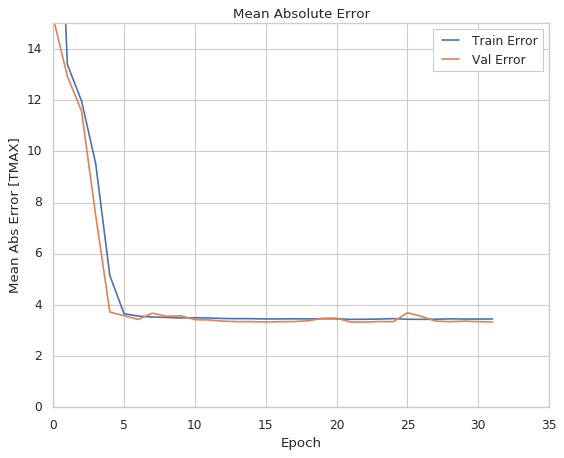

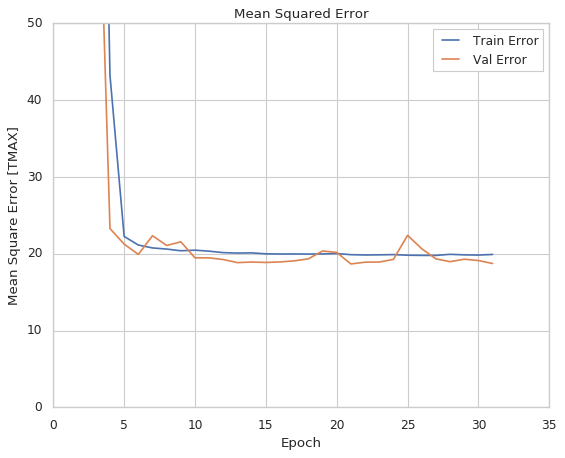

In [0]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])
sns.set(style='whitegrid')
plot_history(history)

The graph shows that on the validation set, the average error is usually around +/- 3.2 degrees fahrenheit. Is this good? We'll leave that decision up to you. Note that this accuracy of this model is less than the single month prediction in the*[ Predicting January Maximum Temperature](https://github.com/kmeezan/ML_surfaceTemp/blob/master/ShareCopyNN_JanTMax.ipynb)* notebook. This is due to the additional dimension of time.

Let's see how well the model generalizes by using the test set, which we did not use when training the model. The test data is a completely fresh set of data points that we will present to the model. This tells us how well we can expect the model to predict when we use it in the real world.

Note that if you run this model multiple times, you will get slightly different values for the Mean Absolute Error. This is because the model learns slightly differently each time!


In [0]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: {:5.2f} Degrees F = TMAX".format(mae))

Testing set Mean Abs Error:  3.31 Degrees F = TMAX


#Test the model
Finally, it is time to test our model and view the results.
##Make predictions

Predict TMAX values using data in the testing set:

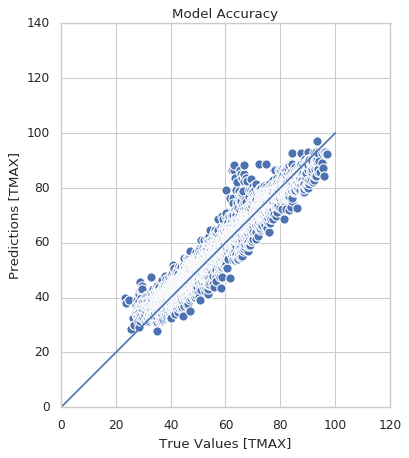

In [0]:
test_predictions = model.predict(normed_test_data).flatten()
#test_predictions2 = model.predict(normed_test_data)
#print(test_predictions2)

# create an empty list to hold the index number of the test data
test_keys = []
for key, value in normed_test_data.items():
  for k, v in value.items():
    test_keys.append(k)

# create a dictionary with the index number and predicted value for test data
test_predictions_keysd =(dict(zip(test_keys, test_predictions)))

#decomment next line to check 
#print(test_predictions_keysd)

sns.set(style='whitegrid')

plt.scatter(x=test_labels, y=test_predictions, s=70)
plt.xlabel('True Values [TMAX]')
plt.ylabel('Predictions [TMAX]')
plt.title('Model Accuracy')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

Reverse the normalization of the data so we can plot latitude & longitude

In [0]:
def de_norm(x):
  return (normed_test_data * train_stats['std'])+(train_stats['mean'])
  
de_normed_test_data = de_norm(normed_test_data)

# un-comment the following line to check that this process worked
# print(de_normed_test_data)


#Plot the data
Let's look at the testing data points and compare actual values to the values predicted by the model.
##Temperature values in 3D
3D visualization of the data (location in 2D space vs. time (z-value) for temperature) is limiting. However, let's take a look at a 3D scatter plot of the data. Next, we will examine montly time slices in 2D.

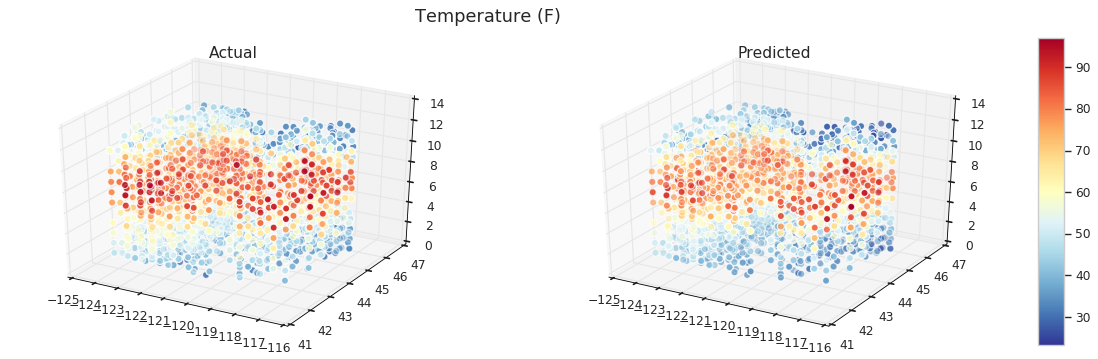

In [0]:
#  -- Actual values --
fig = plt.figure(figsize=plt.figaspect(.3))

# set up the axes for the first plot
ax = fig.add_subplot(1,2,1, projection='3d')


ax.scatter(xs=de_normed_test_data["LONGITUDE"], ys=de_normed_test_data["LATITUDE"], 
                zs=de_normed_test_data["MONTH"], c=test_labels, cmap='RdYlBu_r', s=40, linewidths=0)

fig.suptitle("Temperature (F)", fontsize=16)
ax.set_title("Actual", fontsize=14)

# setup color bar
my_color_bar = ax.scatter(xs=de_normed_test_data["LONGITUDE"], ys=de_normed_test_data["LATITUDE"], 
                zs=de_normed_test_data["MONTH"], c=test_labels, cmap='RdYlBu_r', s=40, linewidths=0)

cb_ax = fig.add_axes([0.93, 0.1, 0.02, 0.8])
cbar = fig.colorbar(my_color_bar, cax=cb_ax)


# -- Predicted Values --
ax2 = fig.add_subplot(1,2,2, projection='3d')

ax2.scatter(xs=de_normed_test_data["LONGITUDE"], ys=de_normed_test_data["LATITUDE"], 
                zs=de_normed_test_data["MONTH"], c=test_predictions, cmap='RdYlBu_r', s=40, linewidths=0)

ax2.set_title("Predicted", fontsize=14)




plt.show()

##Actual vs Predicted Temperature Values 2D Scatter
###Set up the data
Our data is set up in a large array of latitude, longitude, elevation, month and temperature. In this step we will pull out the test data by month so that we can graph each month separately.

In [0]:
# Prep data for 2D graphs 

# -- JANUARY -- 01
january_list = []
lat_01=[]
long_01=[]
tmax_01=[] #actual
tmax_01_p=[] #predicted


for key, value in de_normed_test_data.items():
  if key == 'MONTH':
    for k, v in value.items():
      if v == 1.0:
        january_list.append(k)
       
for i in january_list:
  lat_01.append(de_normed_test_data["LATITUDE"][i])
  long_01.append(de_normed_test_data["LONGITUDE"][i])
  tmax_01.append(test_labels[i])
  tmax_01_p.append(test_predictions_keysd.get(i))


# -- MARCH -- 03
march_list = []
lat_03=[]
long_03=[]
tmax_03=[]
tmax_03_p=[]

for key, value in de_normed_test_data.items():
  if key == 'MONTH':
    for k, v in value.items():
      if v == 3.0:
        march_list.append(k)
       
for i in march_list:
  lat_03.append(de_normed_test_data["LATITUDE"][i])
  long_03.append(de_normed_test_data["LONGITUDE"][i])
  tmax_03.append(test_labels[i])
  tmax_03_p.append(test_predictions_keysd.get(i))

# -- MAY -- 05
may_list = []
lat_05=[]
long_05=[]
tmax_05=[]
tmax_05_p=[]


for key, value in de_normed_test_data.items():
  if key == 'MONTH':
    for k, v in value.items():
      if v == 5.0:
        may_list.append(k)
       
for i in may_list:
  lat_05.append(de_normed_test_data["LATITUDE"][i])
  long_05.append(de_normed_test_data["LONGITUDE"][i])
  tmax_05.append(test_labels[i])
  tmax_05_p.append(test_predictions_keysd.get(i))

# -- JULY -- 07
july_list = []
lat_07=[]
long_07=[]
tmax_07=[]
tmax_07_p=[]


for key, value in de_normed_test_data.items():
  if key == 'MONTH':
    for k, v in value.items():
      if v == 7.0:
        july_list.append(k)
       
for i in july_list:
  lat_07.append(de_normed_test_data["LATITUDE"][i])
  long_07.append(de_normed_test_data["LONGITUDE"][i])
  tmax_07.append(test_labels[i])
  tmax_07_p.append(test_predictions_keysd.get(i))

# -- SEPTEMBER -- 09
sept_list = []
lat_09=[]
long_09=[]
tmax_09=[]
tmax_09_p=[]


for key, value in de_normed_test_data.items():
  if key == 'MONTH':
    for k, v in value.items():
      if v == 9.0:
        sept_list.append(k)
       
for i in sept_list:
  lat_09.append(de_normed_test_data["LATITUDE"][i])
  long_09.append(de_normed_test_data["LONGITUDE"][i])
  tmax_09.append(test_labels[i])
  tmax_09_p.append(test_predictions_keysd.get(i))

# -- NOVEMBER -- 11
november_list = []
lat_11=[]
long_11=[]
tmax_11=[]
tmax_11_p=[]


for key, value in de_normed_test_data.items():
  if key == 'MONTH':
    for k, v in value.items():
      if v == 11.0:
        november_list.append(k)
       
for i in november_list:
  lat_11.append(de_normed_test_data["LATITUDE"][i])
  long_11.append(de_normed_test_data["LONGITUDE"][i])
  tmax_11.append(test_labels[i])
  tmax_11_p.append(test_predictions_keysd.get(i))




###Graph multiple 2D scatter subplots 

[23.3, 23.8, 24.7, 27.2, 27.8, 28.0, 28.2, 28.3, 28.3, 28.3, 28.5, 28.5, 28.7, 28.9, 29.0, 29.1, 29.1, 29.1, 29.2, 29.4, 29.5, 29.6, 29.7, 30.0, 30.2, 30.3, 30.7, 31.0, 31.0, 31.2, 31.2, 31.5, 31.5, 31.5, 31.6, 31.7, 31.7, 31.8, 31.9, 31.9, 32.1, 32.3, 32.4, 32.7, 32.7, 32.7, 32.7, 32.7, 32.8, 32.9, 33.2, 33.2, 33.2, 33.7, 33.8, 33.8, 33.8, 33.8, 33.8, 33.9, 34.1, 34.1, 34.3, 34.4, 34.4, 34.5, 34.5, 34.6, 34.6, 34.6, 34.6, 34.6, 34.7, 34.7, 34.7, 34.7, 34.9, 34.9, 35.1, 35.1, 35.1, 35.3, 35.4, 35.5, 35.5, 35.5, 35.5, 35.5, 35.5, 35.6, 35.6, 35.6, 35.6, 35.7, 35.7, 35.8, 35.8, 35.9, 35.9, 35.9, 36.0, 36.0, 36.2, 36.2, 36.3, 36.3, 36.5, 36.8, 36.9, 37.0, 37.0, 37.0, 37.0, 37.1, 37.1, 37.1, 37.2, 37.2, 37.2, 37.2, 37.2, 37.3, 37.3, 37.3, 37.3, 37.3, 37.5, 37.5, 37.5, 37.5, 37.7, 37.7, 37.7, 37.8, 37.8, 37.9, 37.9, 37.9, 37.9, 38.0, 38.0, 38.0, 38.1, 38.1, 38.2, 38.3, 38.3, 38.4, 38.4, 38.4, 38.5, 38.5, 38.6, 38.6, 38.6, 38.8, 38.9, 38.9, 39.0, 39.4, 39.4, 39.5, 39.6, 39.6, 39.7, 39.8, 39.

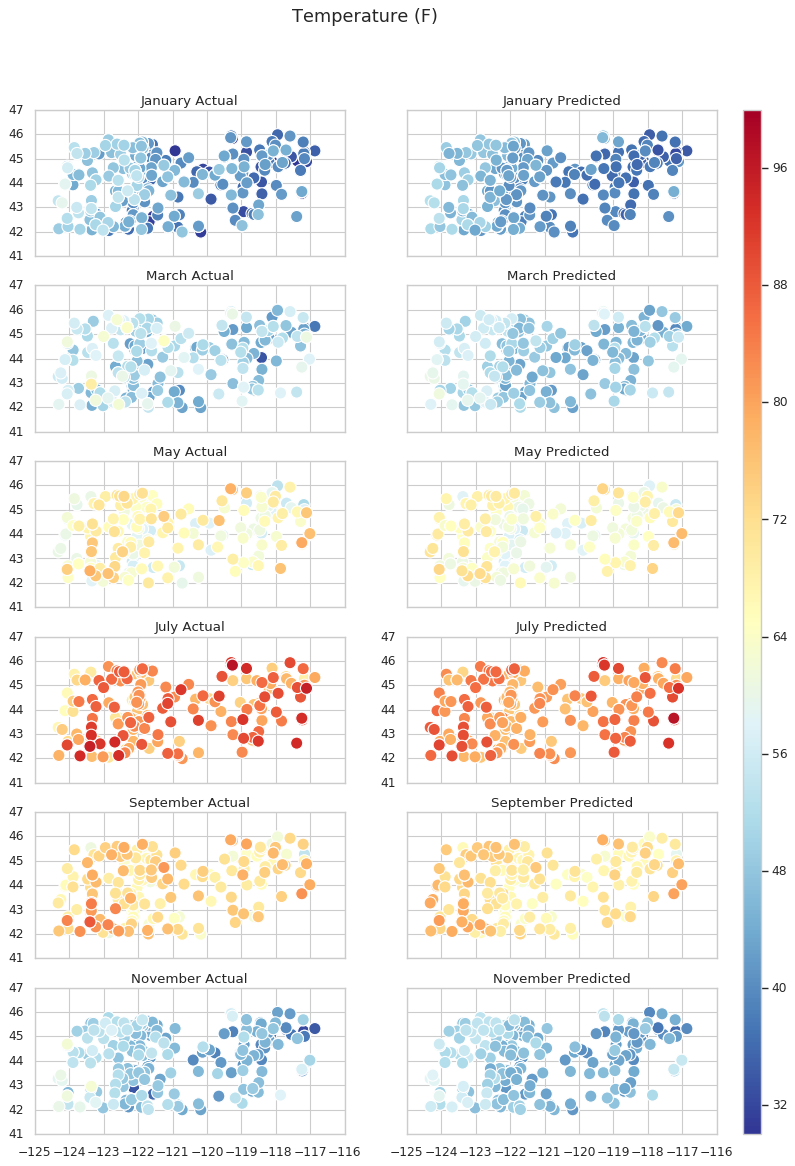

In [0]:
#Setup the master plot
fig, axs = plt.subplots(6, 2, figsize=(11,16))
fig.suptitle("Temperature (F)", fontsize=16)


# ---- Plot January ----
axs[0,0].scatter(x=long_01, y=lat_01, c=tmax_01, cmap='RdYlBu_r', s=120, vmin=30, vmax=100)
axs[0,0].axes.xaxis.set_ticklabels([])
axs[0,0].set_title("January Actual")

#check
print(tmax_01)

axs[0,1].scatter(x=long_01, y=lat_01, c=tmax_01_p, cmap='RdYlBu_r', s=120, vmin=30, vmax=100)
axs[0,1].axes.xaxis.set_ticklabels([])
axs[0,1].axes.yaxis.set_ticklabels([])
axs[0,1].set_title("January Predicted")

#this is a place holder var for the colorbar
my_color_bar = axs[0,0].scatter(x=long_01, y=lat_01, c=tmax_01, cmap='RdYlBu_r', s=120, vmin=30, vmax=100)

# ---- Plot March ----
axs[1,0].scatter(x=long_03, y=lat_03, c=tmax_03, cmap='RdYlBu_r', s=120, vmin=30, vmax=100)
axs[1,0].axes.xaxis.set_ticklabels([])
axs[1,0].set_title("March Actual")
                        
axs[1,1].scatter(x=long_03, y=lat_03, c=tmax_03_p, cmap='RdYlBu_r', s=120, vmin=30, vmax=100)
axs[1,1].axes.xaxis.set_ticklabels([])
axs[1,1].axes.yaxis.set_ticklabels([])
axs[1,1].set_title("March Predicted")                        

# ---- Plot May ----
axs[2,0].scatter(x=long_05, y=lat_05, c=tmax_05, cmap='RdYlBu_r', s=120, vmin=30, vmax=100)
axs[2,0].axes.xaxis.set_ticklabels([])
axs[2,0].set_title("May Actual")
                        
axs[2,1].scatter(x=long_05, y=lat_05, c=tmax_05_p, cmap='RdYlBu_r', s=120, vmin=30, vmax=100)
axs[2,1].axes.xaxis.set_ticklabels([])
axs[2,1].axes.yaxis.set_ticklabels([])
axs[2,1].set_title("May Predicted")                        

# ---- Plot July ----
axs[3,0].scatter(x=long_07, y=lat_07, c=tmax_07, cmap='RdYlBu_r', s=120, vmin=30, vmax=100)
axs[3,0].axes.xaxis.set_ticklabels([])
axs[3,0].set_title("July Actual")
                        
axs[3,1].scatter(x=long_07, y=lat_07, c=tmax_07_p, cmap='RdYlBu_r', s=120, vmin=30, vmax=100)
axs[3,1].axes.xaxis.set_ticklabels([])
axs[3,1].axes.xaxis.set_ticklabels([])                        
axs[3,1].set_title("July Predicted")                        


# ---- Plot September ----
axs[4,0].scatter(x=long_09, y=lat_09, c=tmax_09, cmap='RdYlBu_r', s=120, vmin=30, vmax=100)
axs[4,0].axes.xaxis.set_ticklabels([])                        
axs[4,0].set_title("September Actual")
                        
axs[4,1].scatter(x=long_09, y=lat_09, c=tmax_09_p, cmap='RdYlBu_r', s=120, vmin=30, vmax=100)
axs[4,1].axes.xaxis.set_ticklabels([])  
axs[4,1].axes.yaxis.set_ticklabels([])                        
axs[4,1].set_title("September Predicted")                        


# ---- Plot November ----
axs[5,0].scatter(x=long_11, y=lat_11, c=tmax_11, cmap='RdYlBu_r', s=120, vmin=30, vmax=100)
axs[5,0].set_title("November Actual")
                        
axs[5,1].scatter(x=long_11, y=lat_11, c=tmax_11_p, cmap='RdYlBu_r', s=120, vmin=30, vmax=100)
axs[5,1].axes.yaxis.set_ticklabels([])
axs[5,1].set_title("November Predicted")                        

# setup color bar
cb_ax = fig.add_axes([0.93, 0.1, 0.02, 0.8])
cbar = fig.colorbar(my_color_bar, cax=cb_ax)



#Error
Next, let's look at the error for each data point as calculated by subtracting the actual minus the predicted value. Are some regions more prone to error than others?

First, we will look at overall error to examine whether certain locations are more prone to error than others, then we will break it down by month to see if some time periods are more prone to error than others.

Text(0.5, 1.0, 'Error: Actual - Predicted values')

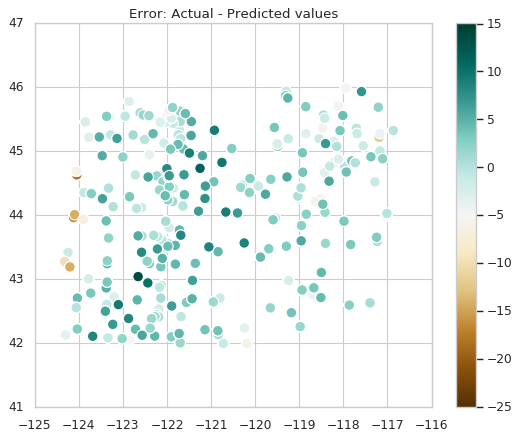

In [0]:
sns.set(style='whitegrid')
plot = plt.scatter(x=de_normed_test_data["LONGITUDE"], y=de_normed_test_data["LATITUDE"], 
                c=(test_labels - test_predictions), cmap='BrBG', s=90)
plt.colorbar(plot)

plt.title("Error: Actual - Predicted values")


##Prepare the data
To examine the error by month, we need to create a list of the error for each data point for each month. We will use the list of points for each month created earlier.

In [0]:
# Error
total_error = test_labels - test_predictions

# ---- January error ----
error_01 = []

for i in january_list:
  error_01.append(total_error[i])
  
# ---- March error ----
error_03 = []

for i in march_list:
  error_03.append(total_error[i])
  
# ---- May error ----
error_05 = []

for i in may_list:
  error_05.append(total_error[i])  
  
# ---- July error ----
error_07 = []

for i in july_list:
  error_07.append(total_error[i]) 
  
# ---- September error ----
error_09 = []

for i in sept_list:
  error_09.append(total_error[i])  
  
# ---- November error ----
error_11 = []

for i in november_list:
  error_11.append(total_error[i])  
   

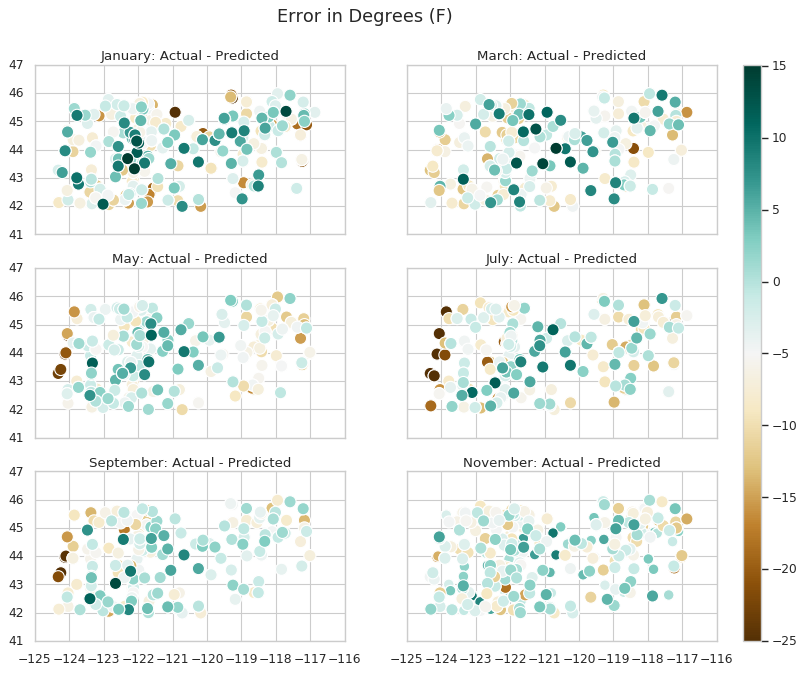

In [0]:
#Set up the master plot
fig, axs = plt.subplots(3, 2, figsize=(11,9))
fig.suptitle("Error in Degrees (F)", fontsize=16)


# ---- Plot January error----
axs[0,0].scatter(x=long_01, y=lat_01, c=error_01, cmap='BrBG', s=120, vmin=-12, vmax=12)
axs[0,0].axes.xaxis.set_ticklabels([])
axs[0,0].set_title("January: Actual - Predicted")


#this is a place holder var for the colorbar
my_color_bar = plt.scatter(x=de_normed_test_data["LONGITUDE"], y=de_normed_test_data["LATITUDE"], 
                c=(test_labels - test_predictions), cmap='BrBG', s=90)

# ---- Plot March error ----
axs[0,1].scatter(x=long_03, y=lat_03, c=error_03, cmap='BrBG', s=120, vmin=-12, vmax=12)
axs[0,1].axes.xaxis.set_ticklabels([])
axs[0,1].axes.yaxis.set_ticklabels([])
axs[0,1].set_title("March: Actual - Predicted")                                             

# ---- Plot May error ----
axs[1,0].scatter(x=long_05, y=lat_05, c=error_05, cmap='BrBG', s=120, vmin=-12, vmax=12)
axs[1,0].axes.xaxis.set_ticklabels([])
axs[1,0].set_title("May: Actual - Predicted")                       

# ---- Plot July error ----
axs[1,1].scatter(x=long_07, y=lat_07, c=error_07, cmap='BrBG', s=120, vmin=-12, vmax=12)
axs[1,1].axes.xaxis.set_ticklabels([])
axs[1,1].axes.yaxis.set_ticklabels([])
axs[1,1].set_title("July: Actual - Predicted")                      

# ---- Plot September error ----
axs[2,0].scatter(x=long_09, y=lat_09, c=error_09, cmap='BrBG', s=120, vmin=-12, vmax=12)                        
axs[2,0].set_title("September: Actual - Predicted")

# ---- Plot November ----
axs[2,1].scatter(x=long_11, y=lat_11, c=error_11, cmap='BrBG', s=120, vmin=-12, vmax=12)
axs[2,1].axes.yaxis.set_ticklabels([])
axs[2,1].set_title("November: Actual - Predicted")                      

# setup color bar
cb_ax = fig.add_axes([0.93, 0.1, 0.02, 0.8])
cbar = fig.colorbar(my_color_bar, cax=cb_ax)



It looks like our model predicts reasonably well. Let's take a look at the error distribution.

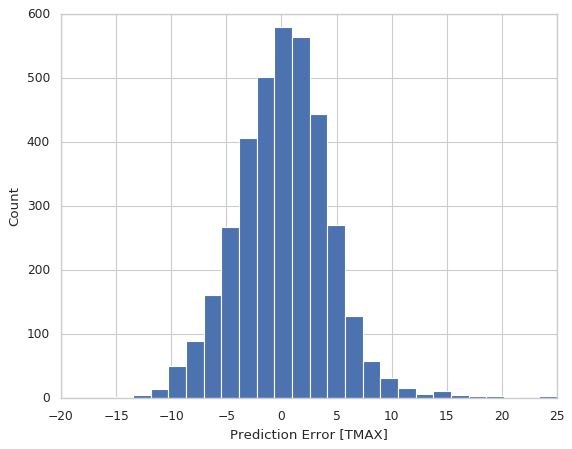

In [0]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [TMAX]")
_ = plt.ylabel("Count")

It's not quite gaussian, but we might expect that because the number of samples is very small.

#Conclusion

This notebook introduced a few techniques to handle a regression problem.


*    Mean Squared Error (MSE) is a common loss function used for regression problems (different loss functions are used for classification problems).
*   Similarly, evaluation metrics used for regression differ from classification. A common regression metric is Mean Absolute Error (MAE).
*   When numeric input data features have values with different ranges, each feature should be scaled independently to the same range.
*   If there is not much training data, one technique is to prefer a small network with few hidden layers to avoid overfitting.
*   Early stopping is a useful technique to prevent overfitting.






    
    
    


